week 2
Customer Experience Analytics for Fintech Apps

In Week 2, I focused on building a data pipeline for bank app reviews, including automated Google Play review scraping, text cleaning, and preprocessing to prepare high-quality datasets. I also created visualizations of ratings, review distributions, and bank-level insights to better understand customer experience patterns across fintech apps. This week established the foundation for deeper sentiment analysis and user experience modeling.

1 scaping the data from google play store

In [65]:
import os
import sys

# =========================
# 1️⃣ Detect notebook directory
# =========================
notebook_dir = os.getcwd()
print("Notebook running from:", notebook_dir)

# =========================
# 2️⃣ Locate project root
# Assumes 'notebooks/' is inside your project root
# =========================
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
print("Detected project root:", project_root)

# =========================
# 3️⃣ Add project root to sys.path for imports
# =========================
if project_root not in sys.path:
    sys.path.append(project_root)
    print("Added project root to sys.path")
else:
    print("Project root already in sys.path")

# =========================
# 4️⃣ Add src and config folders to sys.path
# =========================
src_path = os.path.join(project_root, "src")
config_path = os.path.join(project_root, "config")

for path in [src_path, config_path]:
    if path not in sys.path:
        sys.path.append(path)
        print(f"Added {path} to sys.path")

# =========================
# 5️⃣ Test imports
# =========================
try:
    from src.google_scraper import GooglePlayReviewScraper
    from config.config import DATA_PATHS, APP_IDS, BANK_NAMES, SCRAPING_CONFIG
    print("✅ All modules imported successfully!")
except ImportError as e:
    print("❌ Import failed:", e)


Notebook running from: e:\Customer Experience Analytics for Fintech Apps week_2\Customer-Experience-Analytics-for-Fintech-Apps-week_2
Detected project root: e:\Customer Experience Analytics for Fintech Apps week_2
Project root already in sys.path
✅ All modules imported successfully!


In [66]:
# Initialize scraper
scraper = GooglePlayReviewScraper()
scraper.scrape_all(DATA_PATHS['scraped_reviews'])
df = scraper.scrape_all(DATA_PATHS['scraped_reviews'])
df.head()



Scraping Commercial Bank of Ethiopia...
Scraping Bank of Abyssinia...
Scraping Dashen Bank...


e:\Customer Experience Analytics for Fintech Apps week_2\Customer-Experience-Analytics-for-Fintech-Apps-week_2\src\google_scraper.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


Saved scraped data to data/raw\google_play_reviews.csv
Scraping Commercial Bank of Ethiopia...
Scraping Bank of Abyssinia...
Scraping Dashen Bank...
Saved scraped data to data/raw\google_play_reviews.csv


e:\Customer Experience Analytics for Fintech Apps week_2\Customer-Experience-Analytics-for-Fintech-Apps-week_2\src\google_scraper.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,bank
0,361ac925-5bd6-4455-8efe-95394a4ba679,Mahamed Abdireshid,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,None,2025-11-30 16:24:48,None,NaT,None,Commercial Bank of Ethiopia
1,cb37b096-e071-4f0f-a8fd-067b7d71706d,Kamil Tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,CBE ይለያል።,5,0,5.2.1,2025-11-29 17:22:32,None,NaT,5.2.1,Commercial Bank of Ethiopia
2,70f504ff-daed-40d9-9c89-cc49a95ef659,Abde Semed,https://play-lh.googleusercontent.com/a-/ALV-U...,it's special for me,5,0,5.2.1,2025-11-29 15:54:14,None,NaT,5.2.1,Commercial Bank of Ethiopia
3,28f229b5-0026-41b9-a1eb-b76e74736f63,TOMIZ Creativity,https://play-lh.googleusercontent.com/a-/ALV-U...,Make it user friendly.,2,0,None,2025-11-29 08:17:45,None,NaT,None,Commercial Bank of Ethiopia
4,68d8daea-db47-4e23-a692-755173dea983,Tesfaye Abdi,https://play-lh.googleusercontent.com/a-/ALV-U...,maaliif daddafee install gaafata,3,0,5.2.1,2025-11-28 13:36:32,None,NaT,5.2.1,Commercial Bank of Ethiopia


2 clean the scraping data and create new cleaneed csv 

In [ ]:
from src.clean_reviews import ReviewCleaner

cleaner = ReviewCleaner()
df_clean = cleaner.clean_and_save(
    input_path="data/raw/google_play_reviews.csv",
    output_path="data/processed/cleaned_reviews.csv"
)
df_clean.head()

Cleaned data saved → data/processed/cleaned_reviews.csv


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,bank,cleaned_text,review_date
0,361ac925-5bd6-4455-8efe-95394a4ba679,Mahamed Abdireshid,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,NaN,2025-11-30 16:24:48,NaN,NaN,NaN,Commercial Bank of Ethiopia,good,2025-11-30
1,cb37b096-e071-4f0f-a8fd-067b7d71706d,Kamil Tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,CBE ይለያል።,5,0,5.2.1,2025-11-29 17:22:32,NaN,NaN,5.2.1,Commercial Bank of Ethiopia,cbe,2025-11-29
2,70f504ff-daed-40d9-9c89-cc49a95ef659,Abde Semed,https://play-lh.googleusercontent.com/a-/ALV-U...,it's special for me,5,0,5.2.1,2025-11-29 15:54:14,NaN,NaN,5.2.1,Commercial Bank of Ethiopia,its special for me,2025-11-29
3,28f229b5-0026-41b9-a1eb-b76e74736f63,TOMIZ Creativity,https://play-lh.googleusercontent.com/a-/ALV-U...,Make it user friendly.,2,0,NaN,2025-11-29 08:17:45,NaN,NaN,NaN,Commercial Bank of Ethiopia,make it user friendly.,2025-11-29
4,68d8daea-db47-4e23-a692-755173dea983,Tesfaye Abdi,https://play-lh.googleusercontent.com/a-/ALV-U...,maaliif daddafee install gaafata,3,0,5.2.1,2025-11-28 13:36:32,NaN,NaN,5.2.1,Commercial Bank of Ethiopia,maaliif daddafee install gaafata,2025-11-28


In [70]:
df_clean.shape

(450, 14)

3 Visualize the cleaned data

3.1 Number of reviews per Bank

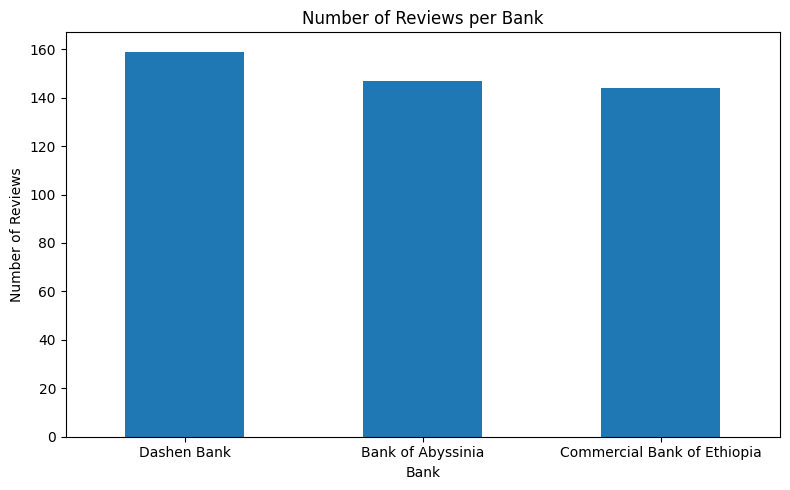

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load cleaned reviews
df_clean = pd.read_csv("E:\Customer Experience Analytics for Fintech Apps week_2\Customer-Experience-Analytics-for-Fintech-Apps-week_2\data\processed\cleaned_reviews.csv")

# Count number of reviews per bank
review_counts = df_clean['bank'].value_counts()

# Plot
plt.figure(figsize=(8,5))
review_counts.plot(kind='bar')
plt.title("Number of Reviews per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


3.2 Average rating per bank

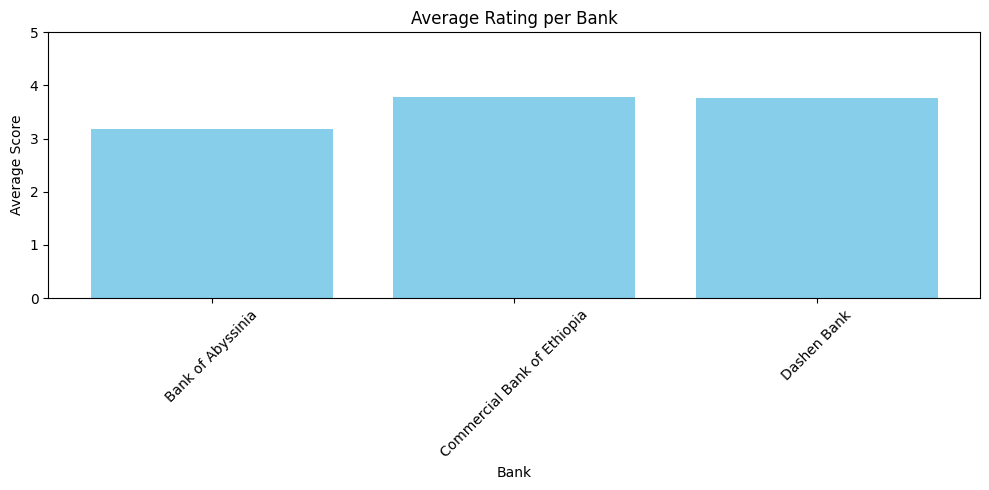

In [ ]:
avg_rating = df_clean.groupby("bank")["score"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(avg_rating["bank"], avg_rating["score"], color="skyblue")

plt.title("Average Rating per Bank")
plt.ylabel("Average Score")
plt.xlabel("Bank")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3.3 Number of reviews per rating of each bank

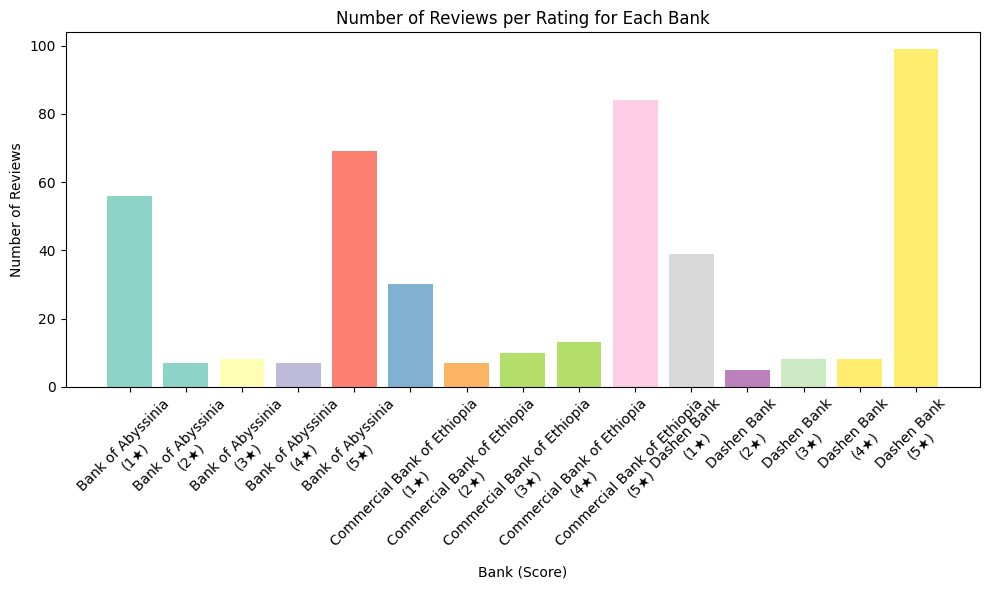

In [ ]:
# Group by bank & rating
rating_counts = df_clean.groupby(["bank", "score"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))

# Generate a unique color for each bar
num_bars = len(rating_counts)
colors = plt.cm.Set3(np.linspace(0, 1, num_bars))   # Set3 = colorful palette

# Plot bars individually
for i, (_, row) in enumerate(rating_counts.iterrows()):
    plt.bar(
        row["bank"] + f"\n({row['score']}★)",    # label includes score
        row["count"],
        color=colors[i]
    )

plt.title("Number of Reviews per Rating for Each Bank")
plt.xlabel("Bank (Score)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3.4 Number of REviews per Rating Score

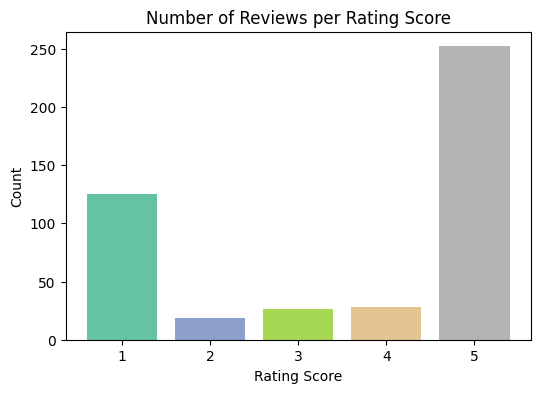

In [ ]:
# Count reviews by score
score_counts = df_clean["score"].value_counts().sort_index()

plt.figure(figsize=(6,4))

# Generate unique colors for each bar
colors = plt.cm.Set2(np.linspace(0, 1, len(score_counts)))  
# You can replace Set2 with: Set3, tab10, Accent, Paired, Pastel1, etc.

plt.bar(score_counts.index, score_counts.values, color=colors)

plt.title("Number of Reviews per Rating Score")
plt.xlabel("Rating Score")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
